In [10]:
!ipfs --version

ipfs version 0.32.1


In [1]:
!ipfs swarm peering add "/ip4/15.235.14.184/udp/4001/quic-v1/p2p/12D3KooWHdZM98wcuyGorE184exFrPEJWv2btXWWSHLQaqwZXuPe"
!ipfs swarm peering add "/ip4/15.235.86.198/udp/4001/quic-v1/p2p/12D3KooWGX5HDDjbdiJL2QYf2f7Kjp1Bj6QAXR5vFvLQniTKwoBR"
!ipfs swarm peering add "/ip4/148.113.168.50/udp/4001/quic-v1/p2p/12D3KooWPwXW1tXzHoHgMofDwc9uzi7PLVHZt7QbLNt2v3pxzoEF"

add 12D3KooWHdZM98wcuyGorE184exFrPEJWv2btXWWSHLQaqwZXuPe success
add 12D3KooWGX5HDDjbdiJL2QYf2f7Kjp1Bj6QAXR5vFvLQniTKwoBR success
add 12D3KooWPwXW1tXzHoHgMofDwc9uzi7PLVHZt7QbLNt2v3pxzoEF success


In [6]:
!uv pip install xarray zarr multiformats git+https://github.com/dClimate/py-hamt.git

Using Python 3.12.7 environment at: /opt/venv
Resolved 34 packages in 2.28s                                        
Audited 34 packages in 1ms


In [2]:
import xarray as xr
from py_hamt import HAMT, IPFSStore
from multiformats import CID

# CPC
# precip-conus bafyr4ibho2tnqtwdor2tydtgdwfphpqvyllthzyktpeqdhusuqr7uicvla
# precip-global bafyr4ig7tljqzj4c755ekvowu42ycw6w4iy7rx465oe6zdpdctfysnko6m
# tmax bafyr4if6jziqxhushl2uc2hdtf2dep55wjb7sbjw3gzl62iy2rr4xi43xu 
# tmin bafyr4iglju2dtpjok5jklq6m44q5dqh7pkrhrc5ufpdw7fobyps63jkjnu

# CHIRPS
# final-p05 bafyr4icutcuta5aarz2gnlhep36vpbw7jke7tfdg2x3f36mhb4fb2a4vmy
# final-p25 bafyr4igp3rotb4ngp4grvyafxq6nfqgem3oweslfrl7l4hp3dchaofibqa
# prelim-p05 bafyr4iaajzls6omuhqqwwawkr6wzlszvflqoybtqlibzckshgqqjubbbae

# Root CID of the HAMT
dataset_cid = "bafyr4ibho2tnqtwdor2tydtgdwfphpqvyllthzyktpeqdhusuqr7uicvla"

root_cid = CID.decode(dataset_cid)

# Create HAMT instance using the IPFSStore connecting to your locally running IPFS Gateway from your local running IPFS Node
hamt = HAMT(store=IPFSStore(gateway_uri_stem="http://0.0.0.0:8080"), root_node_id=root_cid)

# You can instead try running 

ds = xr.open_zarr(store=hamt)
print(ds)

<xarray.Dataset> Size: 942MB
Dimensions:    (latitude: 120, longitude: 300, time: 6538)
Coordinates:
  * latitude   (latitude) float32 480B 20.12 20.38 20.62 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 1kB -129.9 -129.6 -129.4 ... -55.38 -55.12
  * time       (time) datetime64[ns] 52kB 2007-01-01 2007-01-02 ... 2024-11-24
Data variables:
    precip     (time, latitude, longitude) float32 941MB ...
Attributes:
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    Conventions:    COARDS
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    description:    Gridded daily Precipitation
    history:        originally created RT starting 04/2010 by CAS from data o...
    platform:       Observations
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...


In [33]:
# Time to visualize
!uv pip install matplotlib pandas seaborn

Using Python 3.12.7 environment at: /opt/venv
Resolved 15 packages in 655ms                                            
Prepared 1 package in 499ms                                              
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 35ms                                 
 + seaborn==0.13.2


In [3]:
# Define geographic bounding box (e.g., USA region)
lat_min, lat_max = 25, 50  # Latitude range
lon_min, lon_max = -130, -60  # Longitude range

# Define time range
start_date = "2020-01-01"
end_date = "2020-12-31"

# Subset the data
subset = ds.sel(
    latitude=slice(lat_min, lat_max),
    longitude=slice(lon_min, lon_max),
    time=slice(start_date, end_date)
)

# Trigger computation (e.g., convert to numpy or pandas if needed)
precip_data = subset["precip"].compute()

# Compute monthly means
monthly_precip = subset["precip"].groupby("time.month").mean(dim="time")

# Compute spatial averages
spatial_mean = subset["precip"].mean(dim=["latitude", "longitude"])

print(monthly_precip)
print(spatial_mean)


<xarray.DataArray 'precip' (month: 12, latitude: 100, longitude: 280)> Size: 1MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, n

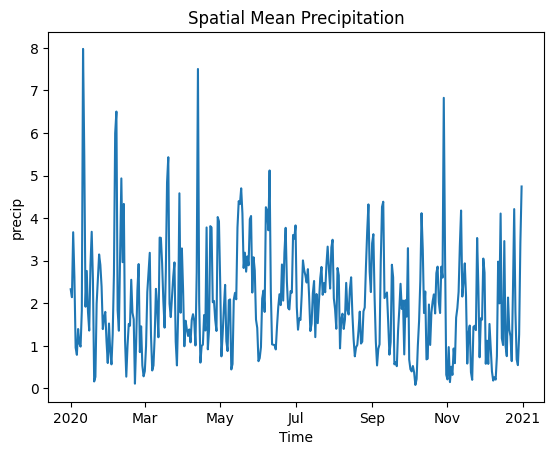

In [4]:
import matplotlib.pyplot as plt

# Plot the spatial mean precipitation over time
spatial_mean.plot()
plt.title("Spatial Mean Precipitation")
plt.show()

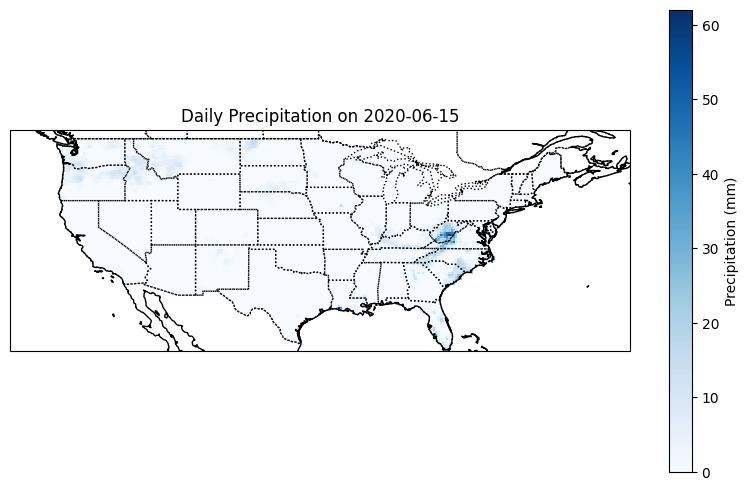

In [5]:
# Visualizing Spatial Data (Map)
# To plot precipitation over a geographic area for a specific day or averaged over a time range:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot precipitation for a specific day
specific_day = subset.sel(time="2020-06-15")  # Choose a date

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
precip = specific_day["precip"].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    cbar_kwargs={"label": "Precipitation (mm)"}
)
ax.set_title("Daily Precipitation on 2020-06-15")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, linestyle=":")
plt.show()

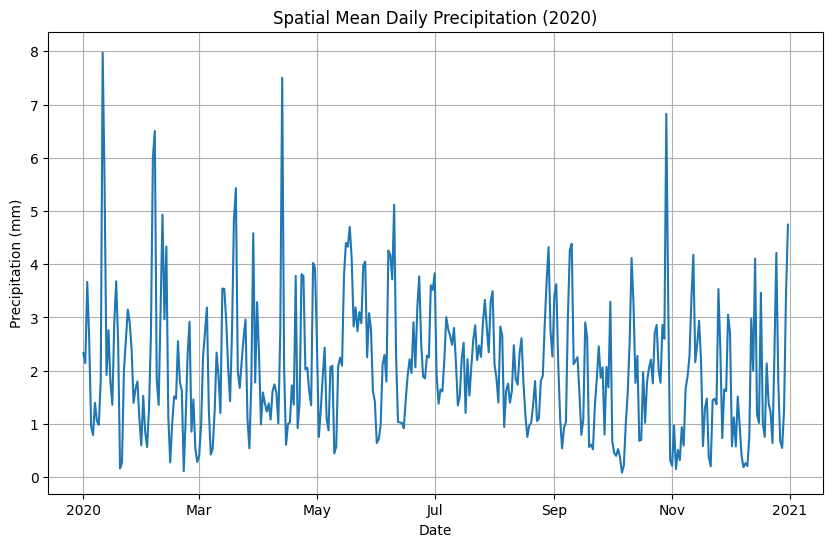

In [6]:
# Time Series Plot
# Calculate spatial mean precipitation
spatial_mean = subset["precip"].mean(dim=["latitude", "longitude"])

plt.figure(figsize=(10, 6))
spatial_mean.plot()
plt.title("Spatial Mean Daily Precipitation (2020)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()

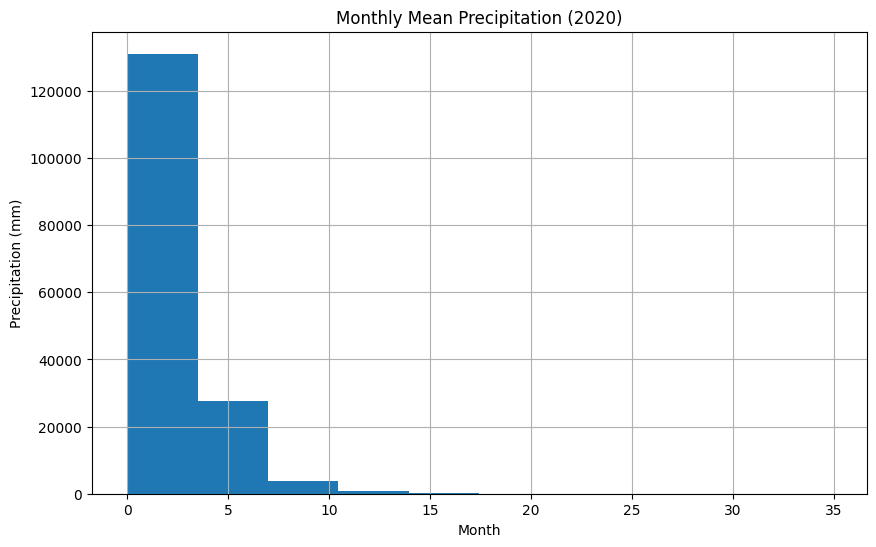

In [7]:
# Monthly Average Precipitation
# To visualize seasonal trends:

# Compute monthly means
monthly_mean = subset["precip"].groupby("time.month").mean(dim="time")

plt.figure(figsize=(10, 6))
monthly_mean.plot()
plt.title("Monthly Mean Precipitation (2020)")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()

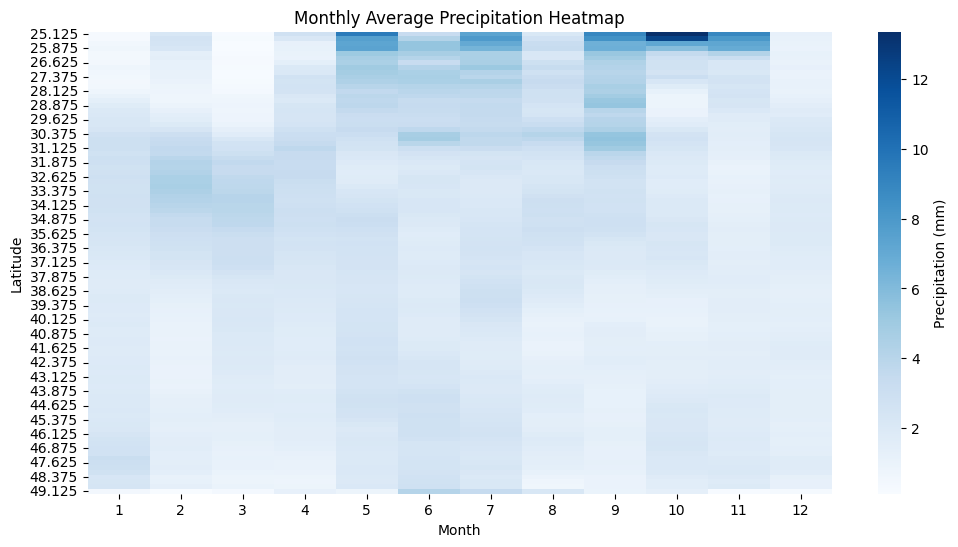

In [8]:
# Spatial Aggregation and Heatmap
# To show aggregated precipitation over time as a heatmap:

import seaborn as sns
import pandas as pd

# Aggregate data (e.g., by month and location)
monthly_precip = subset["precip"].groupby("time.month").mean(dim="time")
monthly_df = monthly_precip.mean(dim=["longitude"]).to_dataframe()

# Plot as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    monthly_df.pivot_table(index="latitude", columns="month", values="precip"),
    cmap="Blues",
    cbar_kws={"label": "Precipitation (mm)"}
)
plt.title("Monthly Average Precipitation Heatmap")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

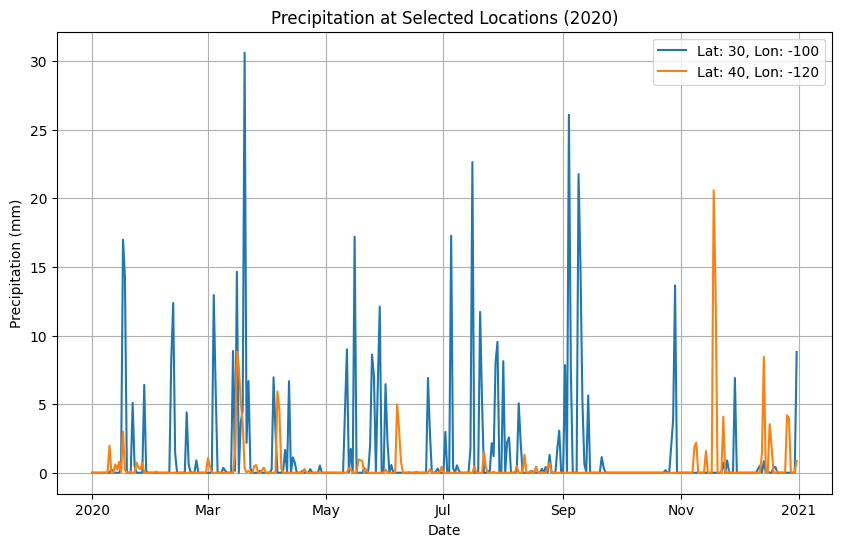

In [9]:
# Comparing Locations
# To plot precipitation for multiple locations over time:

# Select specific locations
locations = [(30, -100), (40, -120)]  # (latitude, longitude) pairs

plt.figure(figsize=(10, 6))
for lat, lon in locations:
    location_precip = subset.sel(latitude=lat, longitude=lon, method="nearest")["precip"]
    location_precip.plot(label=f"Lat: {lat}, Lon: {lon}")

plt.title("Precipitation at Selected Locations (2020)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid()
plt.show()

In [37]:
!uv pip install cartopy

Using Python 3.12.7 environment at: /opt/venv
Resolved 16 packages in 1.09s                                        
Prepared 4 packages in 52.37s                                            
░░░░░░░░░░░░░░░░░░░░ [0/4] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 4 packages in 711ms                               
 + cartopy==0.24.1
 + pyproj==3.7.0
 + pyshp==2.3.1
 + shapely==2.0.6


Subset info:
<xarray.Dataset> Size: 1MB
Dimensions:    (latitude: 100, longitude: 280, time: 11)
Coordinates:
  * latitude   (latitude) float32 400B 25.12 25.38 25.62 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 1kB -129.9 -129.6 -129.4 ... -60.38 -60.12
  * time       (time) datetime64[ns] 88B 2020-06-10 2020-06-11 ... 2020-06-20
Data variables:
    precip     (time, latitude, longitude) float32 1MB ...
Attributes:
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    Conventions:    COARDS
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    description:    Gridded daily Precipitation
    history:        originally created RT starting 04/2010 by CAS from data o...
    platform:       Observations
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...


NameError: name 'animation' is not defined

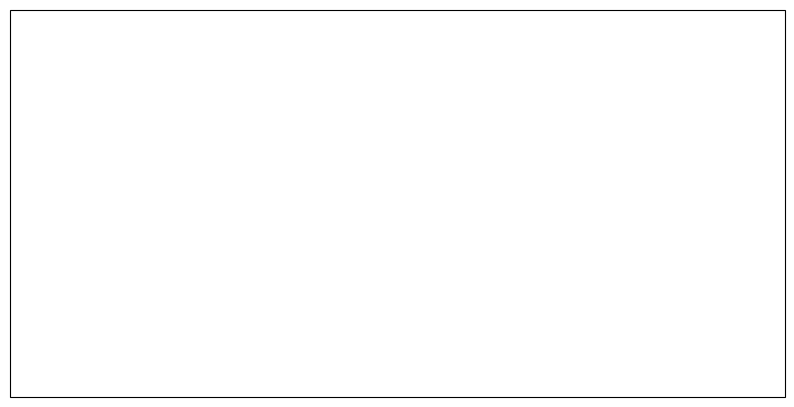

In [10]:
# Create animated GIF

# Define bounding box and time range
lat_min, lat_max = 25, 50  # Latitude range
lon_min, lon_max = -130, -60  # Longitude range
start_date = "2020-06-10"
end_date = "2020-06-20"

# Subset the data
subset = ds.sel(
    latitude=slice(lat_min, lat_max),
    longitude=slice(lon_min, lon_max),
    time=slice(start_date, end_date)
)
print("Subset info:")
print(subset)

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add a single colorbar outside the update function
cbar = None  # Global colorbar reference

def update(frame):
    """Update function for each frame."""
    global cbar  # Refer to the global colorbar

    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.STATES, linestyle=":")

    # Extract precipitation data for the current day
    day_precip = subset.isel(time=frame)["precip"]

    # Plot the precipitation
    precip_plot = day_precip.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        add_colorbar=False  # Prevent automatic addition of a colorbar
    )

    # Add a single colorbar if it hasn't been created
    if cbar is None:
        cbar = fig.colorbar(precip_plot, ax=ax, orientation="vertical", fraction=0.05, pad=0.04)
        cbar.set_label("Precipitation (mm)")

    # Set dynamic title with the current date
    ax.set_title(f"Daily Precipitation: {str(day_precip.time.values)[:10]}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(subset.time), interval=500)

# Save the animation as a GIF
ani.save("precipitation_animation.gif", writer="pillow")
print("Animation saved as 'precipitation_animation.gif'.")

# Close the figure to prevent the static plot from being displayed
plt.close(fig)

from IPython.display import Image, display

# Display the generated GIF
display(Image(filename="precipitation_animation.gif"))

# Optionally display the animation (useful for notebooks)
# plt.show()
